# Understanding Recency Spaces
Use `RecencySpace` to embed datetime signals and configure your embeddings to favor a specific recency profile.

In [ ]:
%pip install superlinked==3.7.0

## Recency Space

In [2]:
import altair as alt
from datetime import timedelta
from superlinked.evaluation.charts.recency_plotter import RecencyPlotter
from superlinked.framework.common.schema.schema import schema
from superlinked.framework.common.schema.schema_object import Timestamp
from superlinked.framework.common.schema.id_schema_object import IdField
from superlinked.framework.dsl.space.recency_space import RecencySpace
from superlinked.framework.common.dag.period_time import PeriodTime

# Enable visualization on Github.
# Ref: https://altair-viz.github.io/user_guide/display_frontends.html
alt.renderers.enable("mimetype")


@schema
class Post:
    id: IdField
    created_at: Timestamp  # Capture date and time as a unix timestamp in seconds.


post = Post()

recency_space = RecencySpace(
    timestamp=post.created_at
)  # Create a recency space to embed datetime information.

Use the `RecencyPlotter` to visualize the value set of the `RecencySpace`.

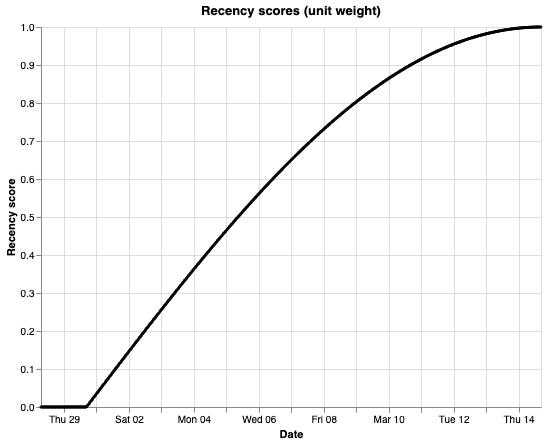

In [3]:
RecencyPlotter(recency_space).plot_recency_curve()

## Periods
You can provide the recency space key dates of interest (periods) to customize the recency space to your requirements.

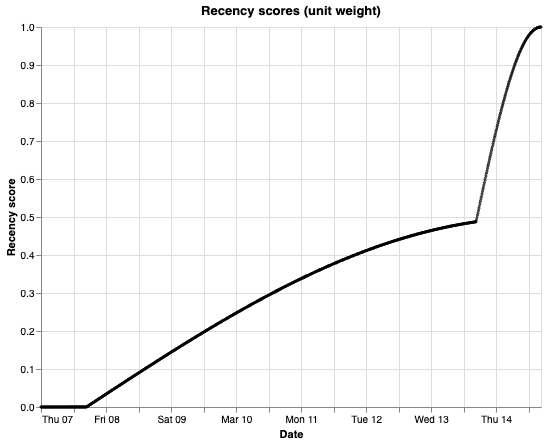

In [4]:
custom_recency_space = RecencySpace(
    timestamp=post.created_at,
    period_time_list=[
        PeriodTime(
            timedelta(days=1)
        ),  # One unit of the signal should be the previous day.
        PeriodTime(timedelta(days=7)),  # Another unit should be the previous week.
        # Anything else should get a zero score.
    ],
)

RecencyPlotter(custom_recency_space).plot_recency_curve()

## Weighted periods
Use weights to give more importance to some periods.

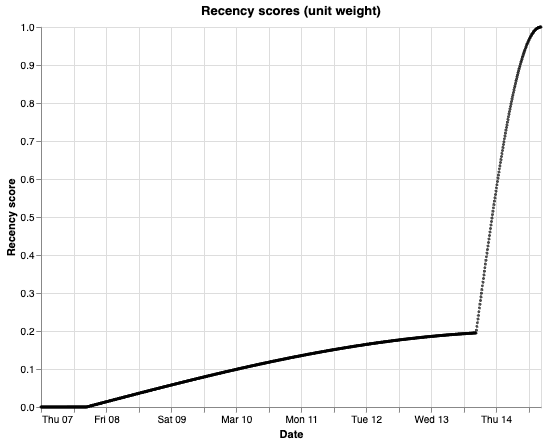

In [5]:
weighted_recency_space = RecencySpace(
    timestamp=post.created_at,
    period_time_list=[
        PeriodTime(timedelta(days=1), weight=2),  # You can tune the ratio with weights.
        PeriodTime(timedelta(days=7)),
    ],
)

RecencyPlotter(weighted_recency_space).plot_recency_curve()

## Setting NOW to a specific date
During execution the RecencySpace will pick up on the NOW timestamp of the system, to allow you to experiment with historical data you can set the time to a specific date with:
```python
from superlinked.framework.common.dag.context import CONTEXT_COMMON, CONTEXT_COMMON_NOW

...

CONTEXT_DATA = {CONTEXT_COMMON: {CONTEXT_COMMON_NOW: NOW_TS}}
executor: InMemoryExecutor = InMemoryExecutor(sources=[...], indices=[...], context_data=CONTEXT_DATA)
```

